In [14]:
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
import seaborn as sns
import pytz

from IPython.display import display
from ipywidgets import interact

In [2]:
# Env vars
DATA_PATH_2018 = "2018.csv"
DATA_PATH_2019 = "2019.csv"
DATA_PATH_2020 = "2020.csv"
DATA_PATH_2021 = "2021.csv"
DATA_PATH_2022 = "2022.csv"


SEP = ','
COL_NAMES = ["RepoID",
            "Name",
            "Type",
            "Topics",
            "Visibility",
            "Language",
            "Published",
            "Last_Modified",
            "Stars",
            "Forks",
            "WatchCount",
            "NetworkCount",
            "IssueCount",
            "PRCount",
            "ProjectsCount",
            "BranchCount",
            "DownloadCount",
            "ContributorCount",
            "RepoURL"]

In [3]:
# Pull CSV to DF
data_2018 = pd.read_csv(DATA_PATH_2018, sep=SEP, names=COL_NAMES)
data_2019 = pd.read_csv(DATA_PATH_2019, sep=SEP, names=COL_NAMES)
data_2020 = pd.read_csv(DATA_PATH_2020, sep=SEP, names=COL_NAMES)
data_2021 = pd.read_csv(DATA_PATH_2021, sep=SEP, names=COL_NAMES)
data_2022 = pd.read_csv(DATA_PATH_2022, sep=SEP, names=COL_NAMES)

In [4]:
# SANITIZING $

# Remove duplicates
data_2018.drop_duplicates(inplace=True)

# convert 'Published' column to datetime format
data_2018['Published'] = pd.to_datetime(data_2018['Published'])

# extract year from the 'Published' column
data_2018['Published'] = data_2018['Published'].dt.year

# Fill NaN's
data_2018['Published'].fillna(0).astype(int)
data_2018['ProjectsCount'].fillna(0).astype(int)

# Drop rows with no language val since that is what we care about
data_2018.dropna(subset=['Language'], inplace=True)

In [5]:
# Remove duplicates
data_2019.drop_duplicates(inplace=True)

# convert 'Published' column to datetime format
data_2019['Published'] = pd.to_datetime(data_2019['Published'])

# extract year from the 'Published' column
data_2019['Published'] = data_2019['Published'].dt.year

# Fill NaN's
data_2019['Published'].fillna(0).astype(int)
data_2019['ProjectsCount'].fillna(0).astype(int)

# Drop rows with no language val since that is what we care about
data_2019.dropna(subset=['Language'], inplace=True)

In [6]:
# Remove duplicates
data_2020.drop_duplicates(inplace=True)

# convert 'Published' column to datetime format
data_2020['Published'] = pd.to_datetime(data_2020['Published'])

# extract year from the 'Published' column
data_2020['Published'] = data_2020['Published'].dt.year

# Fill NaN's
data_2020['Published'].fillna(0).astype(int)
data_2020['ProjectsCount'].fillna(0).astype(int)

# Drop rows with no language val since that is what we care about
data_2020.dropna(subset=['Language'], inplace=True)

In [7]:
# Remove duplicates
data_2021.drop_duplicates(inplace=True)

# convert 'Published' column to datetime format
data_2021['Published'] = pd.to_datetime(data_2021['Published'])

# extract year from the 'Published' column
data_2021['Published'] = data_2021['Published'].dt.year

# Fill NaN's
data_2021['Published'].fillna(0).astype(int)
data_2021['ProjectsCount'].fillna(0).astype(int)

# Drop rows with no language val since that is what we care about
data_2021.dropna(subset=['Language'], inplace=True)

In [8]:
# Remove duplicates
data_2022.drop_duplicates(inplace=True)

# convert 'Published' column to datetime format
data_2022['Published'] = pd.to_datetime(data_2022['Published'])

# extract year from the 'Published' column
data_2022['Published'] = data_2022['Published'].dt.year

# Fill NaN's
data_2022['Published'].fillna(0).astype(int)
data_2022['ProjectsCount'].fillna(0).astype(int)

# Drop rows with no language val since that is what we care about
data_2022.dropna(subset=['Language'], inplace=True)

In [9]:
data_all = pd.concat([data_2018, data_2019, data_2020, data_2021, data_2022])

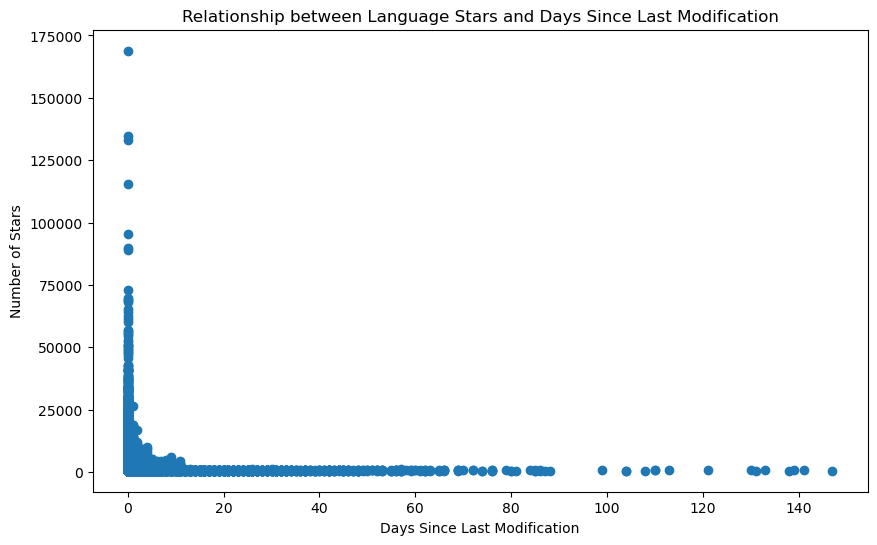

In [39]:
"""
Find a relationship between wether the amount of stars of a language
Is in average higher the more it is maintained 
(closest last_modified date to the current date)
"""

"""
This code should calculate the number of days since the last modification of each repository, 
and then calculate the mean number of stars per day since the last modification for each programming language. 
It then plots this data as a bar graph.

This graph should give you an idea of how the popularity of 
different programming languages is related to how recently their repositories have been modified. 
If a language has a high mean number of stars per day since the last modification, 
it could indicate that the language is popular and actively maintained. 
Conversely, if a language has a low mean number of stars per day since the last modification, 
it could indicate that the language is less popular or less actively maintained.

Note that this is just one way of exploring the relationship between 
language stars and how long a repository has been maintained, 
and there are many other factors that could also influence these trends.
"""

data_maintained_relationship = data_all

# Convert 'Last_Modified' column to datetime and set timezone to UTC
data_maintained_relationship[
    'Last_Modified'
] = pd.to_datetime(data_maintained_relationship['Last_Modified']).dt.tz_convert(pytz.UTC)

# Calculate the number of days since last modification
days_since_modified = pd.Timestamp('now', tz=pytz.UTC) - data_maintained_relationship['Last_Modified']

# Plot the data as a scatter plot
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(days_since_modified.dt.days, data_maintained_relationship['Stars'])

ax.set_xlabel('Days Since Last Modification')
ax.set_ylabel('Number of Stars')
ax.set_title('Relationship between Language Stars and Days Since Last Modification')

plt.show()